In [16]:
%reset
#Experiments for fem~neural networks while studying Machine Learining Techniques
#Training of 1D FEM static, maximum displacement vs Force
#
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

import numpy as np
np.random.seed(1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [17]:
f = pd.read_csv('force1.csv', header=None) # Applied forcet to the 
u = pd.read_csv('disp.csv', header=None)

In [18]:
rnd_indices = np.random.rand(len(f)) < 0.98 #Trial with less training points. Effect of linearity "linearity"

x_train = f[rnd_indices]
y_train = u[rnd_indices]
x_test = f[~rnd_indices]
y_test = u[~rnd_indices]

In [19]:
def baseline_model():
    model = Sequential()
    height = 200
    model.add(Dense(height, input_dim=1, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(1, input_dim=height, activation='linear', kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer="adam")
    return model

# Training the model
model = baseline_model()
model.fit(f, u, epochs=500, verbose = 0)

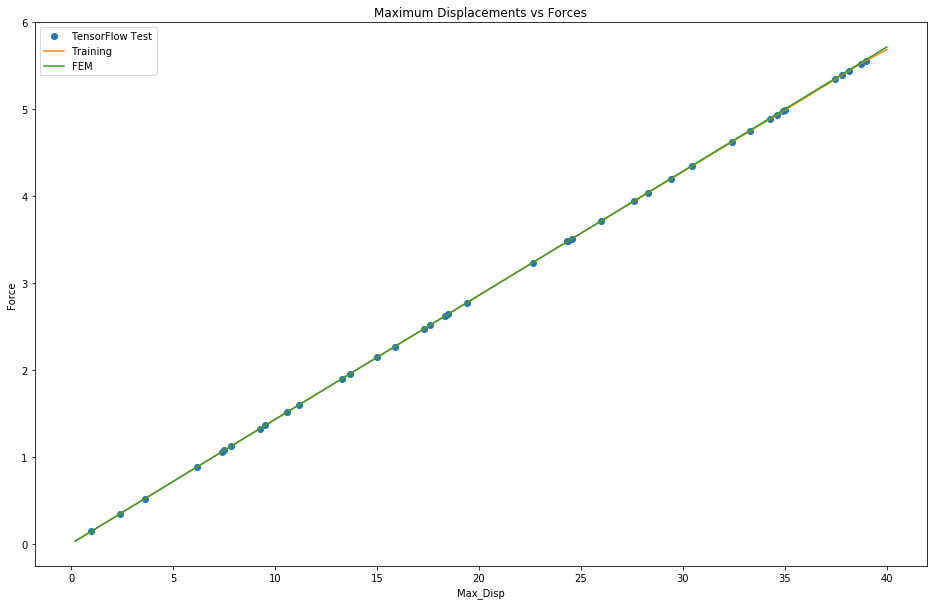

In [20]:
plt.figure(figsize=(16,10))
plt.plot(x_test, model.predict(x_test), 'o')
plt.plot(x_train, model.predict(x_train), '')
plt.plot(f, u, '')

plt.title('Maximum Displacements vs Forces')

plt.xlabel('Max_Disp')
plt.ylabel('Force')
plt.legend(['TensorFlow Test', 'Training', 'FEM'])
plt.show()